# **Load, analysis and visualize dataset**

In [171]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import cv2
import os

In [172]:
##Paths
DATADIR = "C:/Users/funmi/GitRepositories/Road-Sign-Detection/traffic_Data/DATA"

labels_df = pd.read_csv("C:/Users/funmi/GitRepositories/Road-Sign-Detection/labels.csv")

<function matplotlib.pyplot.show(close=None, block=None)>

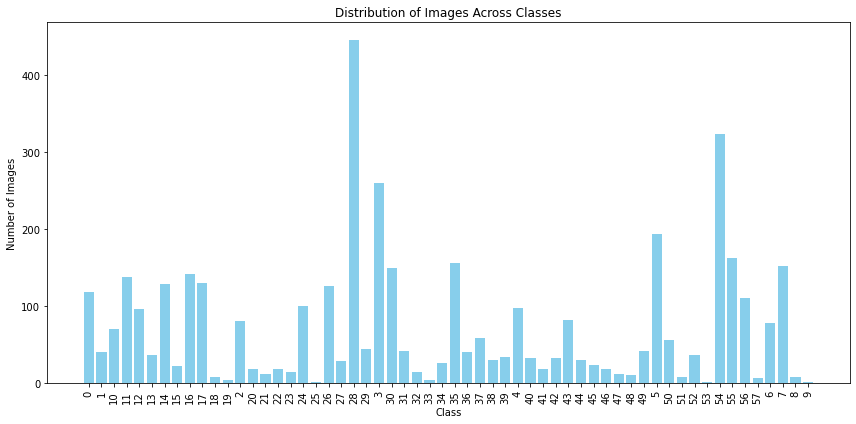

In [ ]:
# Examine class distribution

class_counts = []
class_names =[]

# Iterate through class folders
for class_folder in os.listdir(DATADIR):
    if os.path.isdir(os.path.join(DATADIR, class_folder)):
        class_names.append(class_folder)
        class_count = len(os.listdir(os.path.join(DATADIR, class_folder)))
        class_counts.append(class_count)

# Plot distribution of classes
plt.figure(figsize=(12,6))
plt.bar(class_names, class_counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Images Across Classes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show

# **Preprocessing steps**

In [ ]:

image_shape = (75,75)
batch_size = 32
datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.2)

# Generate training data
train_generator = datagen.flow_from_directory(
    directory=DATADIR,
    class_mode ='categorical',
    subset ='training',
    batch_size = batch_size,
    target_size = image_shape
)

# Generate validation data
validation_generator = datagen.flow_from_directory(
    directory=DATADIR,
    class_mode ='categorical',
    subset ='validation',
    batch_size = batch_size,
    shuffle = False,
    target_size = image_shape
)

Found 3359 images belonging to 58 classes.
Found 811 images belonging to 58 classes.


In [ ]:
# Get the class indices
classes = train_generator.class_indices
classes

{'0': 0,
 '1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '13': 5,
 '14': 6,
 '15': 7,
 '16': 8,
 '17': 9,
 '18': 10,
 '19': 11,
 '2': 12,
 '20': 13,
 '21': 14,
 '22': 15,
 '23': 16,
 '24': 17,
 '25': 18,
 '26': 19,
 '27': 20,
 '28': 21,
 '29': 22,
 '3': 23,
 '30': 24,
 '31': 25,
 '32': 26,
 '33': 27,
 '34': 28,
 '35': 29,
 '36': 30,
 '37': 31,
 '38': 32,
 '39': 33,
 '4': 34,
 '40': 35,
 '41': 36,
 '42': 37,
 '43': 38,
 '44': 39,
 '45': 40,
 '46': 41,
 '47': 42,
 '48': 43,
 '49': 44,
 '5': 45,
 '50': 46,
 '51': 47,
 '52': 48,
 '53': 49,
 '54': 50,
 '55': 51,
 '56': 52,
 '57': 53,
 '6': 54,
 '7': 55,
 '8': 56,
 '9': 57}

# **Build a custom model**

In [ ]:
# Building CNN Model
noOfFilters=32
sizeOfFilter=(3,3)
imageDimensions = (75,75,3)

model = Sequential()

#input layer
model.add(Conv2D(noOfFilters, sizeOfFilter, padding='same', activation='relu',
                input_shape=imageDimensions))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#First hidden layer
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Second hidden layer
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Third hidden Layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

#Output layer
model.add(Dense(train_generator.num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
print(model.summary())
history = model.fit(train_generator,
          epochs=3,
          validation_data=validation_generator)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 75, 75, 32)        896       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 18, 18, 64)      

KeyboardInterrupt: 

In [ ]:
# ##Evaluate the model to see how well the test dataset performs
# score = model.evaluate(test_generator)   #evaluating the test data set
# print('Test Score = ',score[0])
# print('Test Accuracy =', score[1])

In [ ]:
# from matplotlib import pyplot as plt
# ##visualise model accuracy 
# plt.figure(5)
# plt.grid(True)
# plt.plot(history.history['accuracy'], color= 'r')
# plt.plot(history.history['val_accuracy'])
# plt.legend(['Training','Validation'])
# plt.title('Model Accuarcy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.show()

In [ ]:
# ##visualise model loss
# plt.figure(5)
# plt.grid(True)
# plt.plot(history.history['loss'], color= 'r')
# plt.plot(history.history['val_loss'])
# plt.legend(['Training','Validation'])
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.show()

In [ ]:
# # save the entire model
# model.save('model.h5')    # model is a trained keras model.

In [ ]:
# from tensorflow import keras
# import numpy as np
# import cv2
# #testing the model on the testing dataset
# def classifier(Test_data):
#     Current_img = keras.preprocessing.image.load_img(Test_data, target_size=(200,200))
#     Current_img = keras.preprocessing.image.img_to_array(Current_img)
#     Current_img = np.expand_dims(Current_img, axis=0)
#     Current_img = Current_img/255
#     Current_img = np.vstack([Current_img])
#     prediction = model.predict_classes(Current_img)[0][0]
#     accuracy = model.predict(Current_img)[0][0]
#     plt.imshow(cv2.imread(Test_data))
#     print('Accuracy', accuracy)
#     if prediction:
#         print('Speed Limit')
#     else:
#         print('No Speed Limit')

In [ ]:
# classifier("C:/Users/funmi/GitRepositories/Speed-Limit-Sign-Detection/RoadSign.jpg")

In [ ]:
# classifier("C:/Users/funmi/GitRepositories/Speed-Limit-Sign-Detection/NotRoadSign.jpg")